| ![Isaac Zainea](https://raw.githubusercontent.com/Izainea/Izainea.github.io/master/logo.png) | Módulo Machine Learning | Isaac Zainea |
|:---:|:----------------------------------------------------------------------------------:|:---:|

## Otro paquete: Prince

Veremos algunas aplicaciones elementales del paquete prince.

Prince es una biblioteca para hacer análisis factorial. Esto incluye una variedad de métodos, incluido el análisis de componentes principales (PCA) y el análisis de correspondencia (CA). El objetivo es proporcionar una implementación eficiente para cada algoritmo junto con una API scikit-learn.


## Consideraciones

Cada estimador proporcionado por prince amplía TransformerMixin de scikit-learn. Esto significa que cada estimador implementa un a función de ajuste y transformación que los hace utilizables en un proceso de transformación. La función de ajuste es en realidad un alias del método row_principal_components que devuelve los componentes principales de la fila. Sin embargo, también puede acceder a los componentes principales de la columna con column_principal_components.

La programación de Prince usa una versión aleatoria de SVD. Esto es mucho más rápido que utilizar el enfoque completo más común. Sin embargo, los resultados pueden tener una pequeña aleatoriedad inherente. Para la mayoría de las aplicaciones, esto no importa y no debería tener que preocuparse por ello. Sin embargo, si desea resultados reproducibles, debe configurar el parámetro random_state.

La versión aleatoria de SVD es un método iterativo. Debido a que cada uno de los algoritmos de Prince usa SVD, todos poseen un parámetro n_iter que controla el número de iteraciones utilizadas para calcular el SVD. Por un lado, cuanto mayor sea n_iter, más precisos serán los resultados. Por otro lado, aumentar n_iter aumenta el tiempo de cálculo. En general, el algoritmo converge muy rápidamente, por lo que se recomienda utilizar un n_iter bajo (que es el comportamiento predeterminado).

Se supone que debe usar cada método según su situación:

* Todas sus variables son numéricas: utilice el análisis de componentes principales (prince.PCA)
* Tienes una tabla de contingencia: usa el análisis de correspondencia (prince.CA)
*  Tiene más de 2 variables y todas son categóricas: use análisis de correspondencia múltiple (prince.MCA)
* Tiene grupos de variables categóricas o numéricas: use análisis de factores múltiples (prince.MFA)
* Tiene variables categóricas y numéricas: utilice el análisis factorial de datos mixtos (prince.FAMD)


## Análisis de componentes principales

Todas las variables numéricas

In [1]:
!pip install prince

  Using cached prince-0.13.0-py3-none-any.whl.metadata (638 bytes)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
Using cached prince-0.13.0-py3-none-any.whl (415 kB)
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/857.8 kB ? eta -:--:--
   - ------------------------------------- 41.0/857.8 kB 495.5 kB/s eta 0:00:02
   ----- ---------------------------------- 112.6/857.8 kB 1.1 MB/s eta 0:00:01
   ------ ------------------------------- 143.4/857.8 kB 950.9 kB/s eta 0:00:01
   ---------- ----------------------------- 235.5/857.8 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 389.1/857.8 kB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 522.2/857.8 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  839.7/857.8 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 857.8/857.8 kB 2.5 MB/s eta 0:00:00
   -------------------------------

In [2]:
import pandas as pd
from prince import PCA
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [3]:
pd.options.display.max_rows = 50

In [4]:
DF=pd.concat([X,y],axis=1)
DF.columns=['Sepal length','Sepal width','Petal length','Petal width','Species']
DF.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: xlabel='Species', ylabel='Sepal length'>

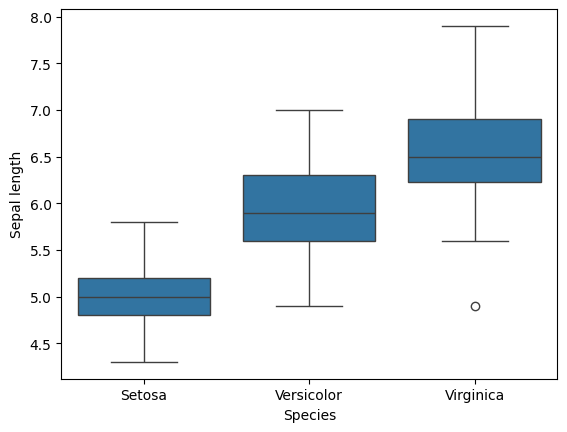

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Species', y='Sepal length', data=DF)

<Axes: xlabel='Sepal width', ylabel='Petal width'>

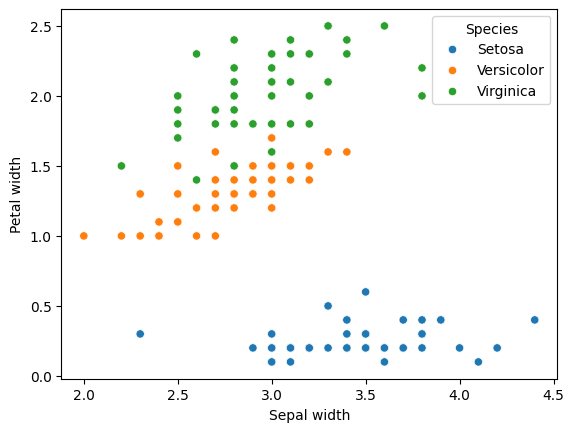

In [6]:
sns.scatterplot(x='Sepal width', y='Petal width', hue='Species', data=DF)

<Axes: xlabel='Sepal length', ylabel='Sepal width'>

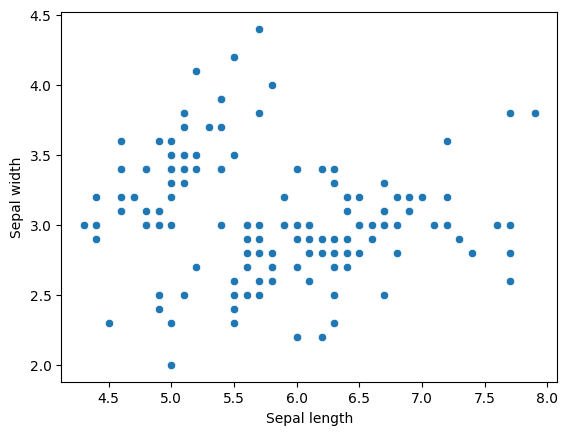

In [11]:
sns.scatterplot(x='Sepal length', y='Sepal width', data=DF)

In [8]:
### Correlaciones entre variables
DF[['Sepal length','Sepal width','Petal length','Petal width']].corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.117570,0.871754,0.817941
Sepal width,-0.117570,1.000000,-0.428440,-0.366126
Petal length,0.871754,-0.428440,1.000000,0.962865
Petal width,0.817941,-0.366126,0.962865,1.000000


In [15]:
#instanciamos el objeto PCA
pca = PCA(
    n_components=4,
     n_iter=10,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='scipy',
     random_state=42
 )

In [13]:
pca

PCA(engine='scipy', n_components=4, n_iter=10, random_state=42)

In [14]:
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
## Entreno el objeto
pca = pca.fit(X,)

Los parámetros disponibles son:

* n_components: el número de componentes que se calculan. Solo necesita dos si su intención es hacer un gráfico.
* n_iter: el número de iteraciones utilizadas para calcular la SVD
* rescale_with_mean: si restar la media de cada columna
* rescale_with_std: si dividir cada columna por su desviación estándar
* copy: si es False, los cálculos se realizarán en el lugar, lo que puede tener posibles efectos secundarios en los datos de entrada
* engine: qué motor SVD usar (debe ser uno de ['auto', 'fbpca', 'sklearn'])
* random_state: controla la aleatoriedad de los resultados de SVD.

Una vez que se ha ajustado el PCA, se puede utilizar para extraer las coordenadas principales de la fila de la siguiente manera:

In [17]:
DF_PCA=pca.transform(X)
DF_PCA

component,0,1,2,3
0,-2.264703,-0.480027,0.127706,0.024168
1,-2.080961,0.674134,0.234609,0.103007
2,-2.364229,0.341908,-0.044201,0.028377
3,-2.299384,0.597395,-0.091290,-0.065956
4,-2.389842,-0.646835,-0.015738,-0.035923
...,...,...,...,...
145,1.870503,-0.386966,-0.256274,0.389257
146,1.564580,0.896687,0.026371,0.220192
147,1.521170,-0.269069,-0.180178,0.119171
148,1.372788,-1.011254,-0.933395,0.026129


In [18]:
DF_PCA.corr()

component,0,1,2,3
component,,,,
0,1.000000e+00,2.962867e-16,2.261883e-17,-1.376424e-15
1,2.962867e-16,1.000000e+00,3.204981e-17,6.234124e-16
2,2.261883e-17,3.204981e-17,1.000000e+00,-1.362527e-15
3,-1.376424e-15,6.234124e-16,-1.362527e-15,1.000000e+00


In [19]:
DF_PCA.describe()

component,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.705303e-15,2.344791e-15,1.480297e-16,5.980401e-16
std,1.714084e+00,9.592523e-01,3.843720e-01,1.444087e-01
min,-2.774345e+00,-2.686284e+00,-1.005401e+00,-4.894835e-01
25%,-2.102721e+00,-5.940342e-01,-1.945133e-01,-7.467770e-02
50%,4.183111e-01,-1.750202e-02,-2.476241e-02,6.827793e-03
75%,1.343027e+00,5.984875e-01,2.590613e-01,9.088263e-02
max,3.310696e+00,2.654073e+00,8.574218e-01,4.696966e-01


In [20]:
DF_PCA.columns=['Componente 1','Componente 2','Componente 3','Componente 4']
DF_PCA

,Componente 1,Componente 2,Componente 3,Componente 4
0,-2.264703,-0.480027,0.127706,0.024168
1,-2.080961,0.674134,0.234609,0.103007
2,-2.364229,0.341908,-0.044201,0.028377
3,-2.299384,0.597395,-0.091290,-0.065956
4,-2.389842,-0.646835,-0.015738,-0.035923
...,...,...,...,...
145,1.870503,-0.386966,-0.256274,0.389257
146,1.564580,0.896687,0.026371,0.220192
147,1.521170,-0.269069,-0.180178,0.119171
148,1.372788,-1.011254,-0.933395,0.026129


Cada columna representa un componente principal, mientras que cada fila representa una fila en el conjunto de datos original. Puede mostrar estas proyecciones con el comando plot_row_coordinates:

In [58]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Length: 150, dtype: object

<Axes: xlabel='Componente 1', ylabel='Componente 2'>

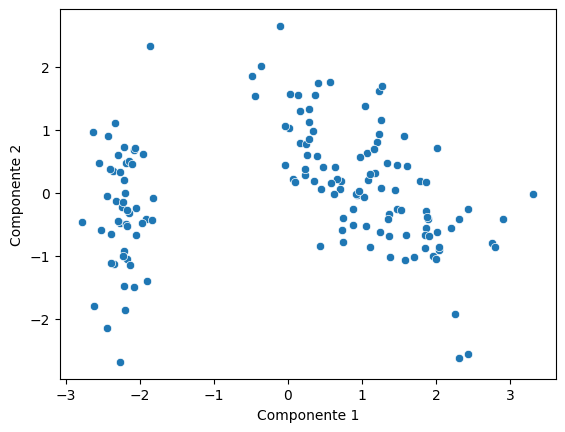

In [25]:
sns.scatterplot(x='Componente 1', y='Componente 2',data=DF_PCA)

Cada componente principal explica parte del subyacente de la distribución. Puede ver cuánto utilizando el acceso a la explained_inertia_ property:

In [24]:
pca.cumulative_percentage_of_variance_

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

La inercia explicada representa el porcentaje de la inercia que aporta cada componente principal. Suma hasta 1 si la propiedad n_components es igual al número de columnas del conjunto de datos original. La inercia explicada se obtiene dividiendo los autovalores obtenidos con la SVD por la inercia total, ambos también accesibles.

In [61]:
pca.eigenvalues_

array([2.91849782, 0.91403047])

In [62]:
pca.total_inertia_

4.0

También puede obtener las correlaciones entre las variables originales y los componentes principales.

In [63]:
pca.column_correlations

component,0,1
variable,,
Sepal length,0.890169,-0.360830
Sepal width,-0.460143,-0.882716
Petal length,0.991555,-0.023415
Petal width,0.964979,-0.064000


También es posible saber cuánto contribuye cada observación a cada componente principal. Esto se puede hacer con el comando row_contributions.

También puede transformar las proyecciones de filas a su espacio original utilizando la función inverse_transform.

In [64]:
pca.inverse_transform(pca.transform(X))

,0,1,2,3
0,5.018949,3.514854,1.466013,0.251922
1,4.738463,3.030433,1.603913,0.272074
2,4.720130,3.196830,1.328961,0.167414
3,4.668436,3.086770,1.384170,0.182247
4,5.017093,3.596402,1.345411,0.206706
...,...,...,...,...
145,6.768251,2.993679,5.684797,2.021678
146,6.236857,2.514614,5.317081,1.825121
147,6.581303,2.987266,5.322985,1.865778
148,6.748671,3.302311,5.203441,1.839848


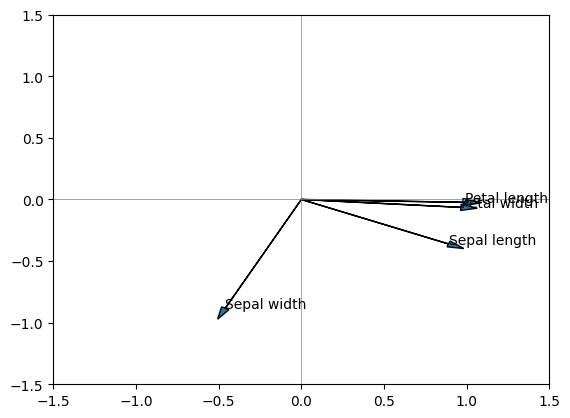

In [42]:
### Pintamos los vectores que reopresenta cada variable en el espacio de las componentes principales

fig, ax = plt.subplots()
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

for idx, (x,y) in enumerate(zip(pca.column_correlations.iloc[:,0],pca.column_correlations.iloc[:,1])):
    ax.arrow(0,0,x,y,head_width=0.05,head_length=0.1)
    ax.text(x,y,pca.column_correlations.index[idx])


## Análisis de correspondencias

El análisis de correspondencia se utiliza cuando se desea analizar una tabla de contingencia. En otras palabras, buscamos analizar las dependencias entre dos variables categóricas.

In [30]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
X = pd.DataFrame(
   data=[
       [426, 345, 0, 11, 3],
       [54, 110, 45, 0, 4],
       [31, 84, 409, 41, 26],
       [12, 28, 40, 381, 5]],
   columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
   index=pd.Series(['Blue', 'Light', 'Medium', 'Dark']))
X


,Fair,Red,Medium,Dark,Black
Blue,426,345,0,11,3
Light,54,110,45,0,4
Medium,31,84,409,41,26
Dark,12,28,40,381,5


In [32]:
X.sum()

Fair      523
Red       567
Medium    494
Dark      433
Black      38
dtype: int64

In [31]:
## COMO ES ESTE DATASET

DF_ojos_cabello=pd.DataFrame()

list_ojos=[]

for i in X.columns:
    for j in X.index:
        for n in range(int(X.loc[j,i])):
            list_ojos.append(j)

list_cabello=[]
for i in X.columns:
    for j in X.index:
        for n in range(int(X.loc[j,i])):
            list_cabello.append(i)

DF_ojos_cabello['Ojos']=list_ojos
DF_ojos_cabello['Cabello']=list_cabello

DF_ojos_cabello

,Ojos,Cabello
0,Blue,Fair
1,Blue,Fair
2,Blue,Fair
3,Blue,Fair
4,Blue,Fair
...,...,...
2050,Dark,Black
2051,Dark,Black
2052,Dark,Black
2053,Dark,Black


In [36]:
DF_ojos_cabello.value_counts()

Ojos    Cabello
Blue    Fair       426
Medium  Medium     409
Dark    Dark       381
Blue    Red        345
Light   Red        110
Medium  Red         84
Light   Fair        54
        Medium      45
Medium  Dark        41
Dark    Medium      40
Medium  Fair        31
Dark    Red         28
Medium  Black       26
Dark    Fair        12
Blue    Dark        11
Dark    Black        5
Light   Black        4
Blue    Black        3
Name: count, dtype: int64

In [66]:
X1=X[["Fair","Red","Dark","Black"]]
X1=X1.iloc[[0,1,3]]
X1

,Fair,Red,Dark,Black
Blue,426,345,11,3
Light,54,110,0,4
Dark,12,28,381,5


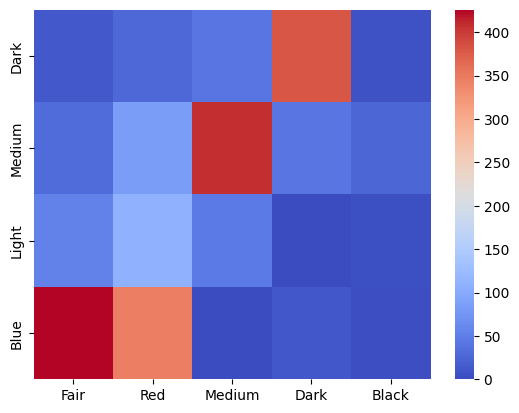

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(X,cmap='coolwarm')
ax.set_xlim(0,5)
ax.set_ylim(0,4)
plt.show()



In [43]:
import prince

## Instanciamos el objeto
ca = prince.CA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42)

In [46]:
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
X

Hair color,Fair,Red,Medium,Dark,Black
Eye color,,,,,
Blue,426,345,0,11,3
Light,54,110,45,0,4
Medium,31,84,409,41,26
Dark,12,28,40,381,5


In [47]:
## Entrenamos el objeto
ca = ca.fit(X)

In [54]:
DF_2=ca.row_coordinates(X)
DF_2['Legend']='Ojos'
DF_2

,0,1,Legend
Eye color,,,
Blue,-0.807366,-0.450074,Ojos
Light,-0.535205,0.090845,Ojos
Medium,0.206225,1.076692,Ojos
Dark,1.343137,-0.648855,Ojos


In [55]:
DF=ca.column_coordinates(X)
DF['Legend']='Pelo'
DF

,0,1,Legend
Hair color,,,
Fair,-0.800613,-0.432923,Pelo
Red,-0.595468,-0.180819,Pelo
Medium,0.275790,1.189659,Pelo
Dark,1.411383,-0.674638,Pelo
Black,0.236359,0.878149,Pelo


In [56]:
DF_3=pd.concat([DF,DF_2])
DF_3

,0,1,Legend
Fair,-0.800613,-0.432923,Pelo
Red,-0.595468,-0.180819,Pelo
Medium,0.275790,1.189659,Pelo
Dark,1.411383,-0.674638,Pelo
Black,0.236359,0.878149,Pelo
Blue,-0.807366,-0.450074,Ojos
Light,-0.535205,0.090845,Ojos
Medium,0.206225,1.076692,Ojos
Dark,1.343137,-0.648855,Ojos


Puede trazar ambos conjuntos de coordenadas principales con el método plot_coordinates.

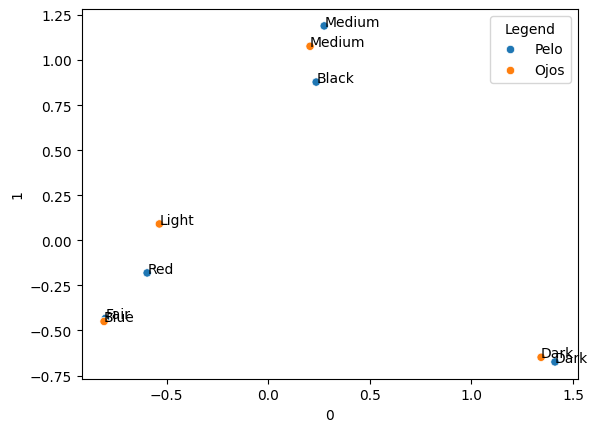

In [51]:
sns.scatterplot(x=0, y=1,data=DF_3,hue='Legend')
for i in range(len(DF_3)):
    plt.text(DF_3.iloc[i,0],DF_3.iloc[i,1],DF_3.index[i])

In [52]:
ca.eigenvalues_

array([0.70000697, 0.50709988])

In [53]:
ca.cumulative_percentage_of_variance_

array([57.2452341 , 98.71489422])

In [105]:
ca.total_inertia_

1.2228214014382508

## Análisis de correspondencias multiples

# Análisis de Correspondencias Múltiples

El Análisis de Correspondencias Múltiples (ACM) es una técnica estadística utilizada para analizar y visualizar datos categóricos en múltiples variables. A diferencia del Análisis de Componentes Principales (PCA), que se utiliza para datos numéricos, el ACM es aplicable a variables categóricas y proporciona información sobre las relaciones entre categorías y variables en un conjunto de datos.

## ¿Por qué es importante el Análisis de Correspondencias Múltiples?

En muchos conjuntos de datos, especialmente aquellos que involucran variables categóricas, es crucial comprender las relaciones y asociaciones entre diferentes categorías y variables. El ACM nos permite explorar y visualizar estas relaciones de manera efectiva al reducir la dimensionalidad de los datos y mostrar patrones significativos en un espacio de menor dimensión.

## Técnicas y pasos en el Análisis de Correspondencias Múltiples

El ACM implica una serie de pasos para su implementación:

- Creación de una tabla de contingencia: Se construye una tabla que muestra las frecuencias de las combinaciones de categorías entre variables.

- Cálculo de las contribuciones y las inercias: Se calculan las contribuciones y las inercias de las categorías y las variables para determinar su importancia en el análisis.

- Cálculo de las coordenadas: Se calculan las coordenadas de las categorías y las variables en un espacio de menor dimensión, donde las categorías y las variables que están asociadas se agrupan juntas.

- Visualización de los resultados: Se generan gráficos, como el biplot de ACM, para visualizar las relaciones y las asociaciones entre las categorías y las variables en el espacio de menor dimensión.

## Aplicaciones del Análisis de Correspondencias Múltiples

El ACM encuentra aplicaciones en diversos campos, como el análisis de encuestas, el estudio de preferencias del consumidor, el análisis de datos de marketing y la investigación social. Permite descubrir patrones y relaciones ocultas en datos categóricos, lo que puede proporcionar información valiosa para la toma de decisiones y la comprensión de fenómenos complejos.

## Evaluación de los resultados del Análisis de Correspondencias Múltiples

La evaluación de los resultados del ACM implica examinar la calidad de la representación de los datos en el espacio de menor dimensión y analizar la interpretabilidad de los patrones y las asociaciones descubiertas. Además, se pueden utilizar medidas estadísticas, como las inercias relativas y los porcentajes de inercia explicada, para evaluar la calidad del análisis y la importancia de las variables y las categorías en el espacio reducido.

## Análisis de correspondencias múltiples en Python

El análisis de correspondencia múltiple (ACM) es una extensión del análisis de correspondencia (AC). Debería utilizarse cuando tenga más de dos variables categóricas. La idea es simplemente calcular los one-hot-vector de un conjunto de datos y aplicar CA en él. Como ejemplo, usaremos el conjunto de datos de [globos](https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/) tomados del sitio web de conjuntos de datos de UCI.

In [57]:
import pandas as pd

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
dataset.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
dataset

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,F
7,YELLOW,LARGE,DIP,ADULT,F
8,YELLOW,LARGE,DIP,CHILD,F
9,PURPLE,SMALL,STRETCH,ADULT,T


In [58]:
import prince

## Instanciamos el objeto
mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

## Entrenamos el objeto
mca = mca.fit(dataset)


In [59]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.402,40.17%,40.17%
1,0.211,21.11%,61.28%
2,0.186,18.56%,79.84%


In [60]:
mca.row_coordinates(dataset)

,0,1,2
0,0.705387,0.000000,0.758639
1,-0.386586,0.000000,0.626063
2,-0.386586,0.000000,0.626063
3,-0.852014,0.000000,0.562447
4,0.783539,-0.633333,0.130201
5,0.783539,-0.633333,0.130201
6,-0.308434,-0.633333,-0.002375
7,-0.308434,-0.633333,-0.002375
8,-0.773862,-0.633333,-0.065991
9,0.783539,0.633333,0.130201


In [63]:
DF_3d=mca.column_coordinates(dataset)
DF_3d

,0,1,2
Color_PURPLE,0.117308,0.689202,-0.641270
Color_YELLOW,-0.130342,-0.765780,0.712523
Size_LARGE,0.117308,-0.689202,-0.641270
Size_SMALL,-0.130342,0.765780,0.712523
Action_DIP,-0.853864,-0.000000,-0.079340
Action_STRETCH,0.620992,0.000000,0.057702
Age_ADULT,0.620992,0.000000,0.057702
Age_CHILD,-0.853864,-0.000000,-0.079340
Inflated_F,-0.731466,-0.000000,-0.054731
Inflated_T,1.253942,0.000000,0.093825


In [62]:
mca.plot(
    dataset,
    x_component=0,
y_component=1,
show_row_markers=False,

)


alt.LayerChart(...)

In [6]:
mca.column_cosine_similarities(dataset)

,0,1,2
Color_PURPLE,0.015290,5.277778e-01,0.456920
Color_YELLOW,0.015290,5.277778e-01,0.456920
Size_LARGE,0.015290,5.277778e-01,0.456920
Size_SMALL,0.015290,5.277778e-01,0.456920
Action_DIP,0.530243,2.948838e-31,0.004578
Action_STRETCH,0.530243,2.175498e-32,0.004578
Age_ADULT,0.530243,6.221548e-31,0.004578
Age_CHILD,0.530243,1.519021e-31,0.004578
Inflated_F,0.917217,4.537529e-33,0.005135
Inflated_T,0.917217,2.343882e-31,0.005135


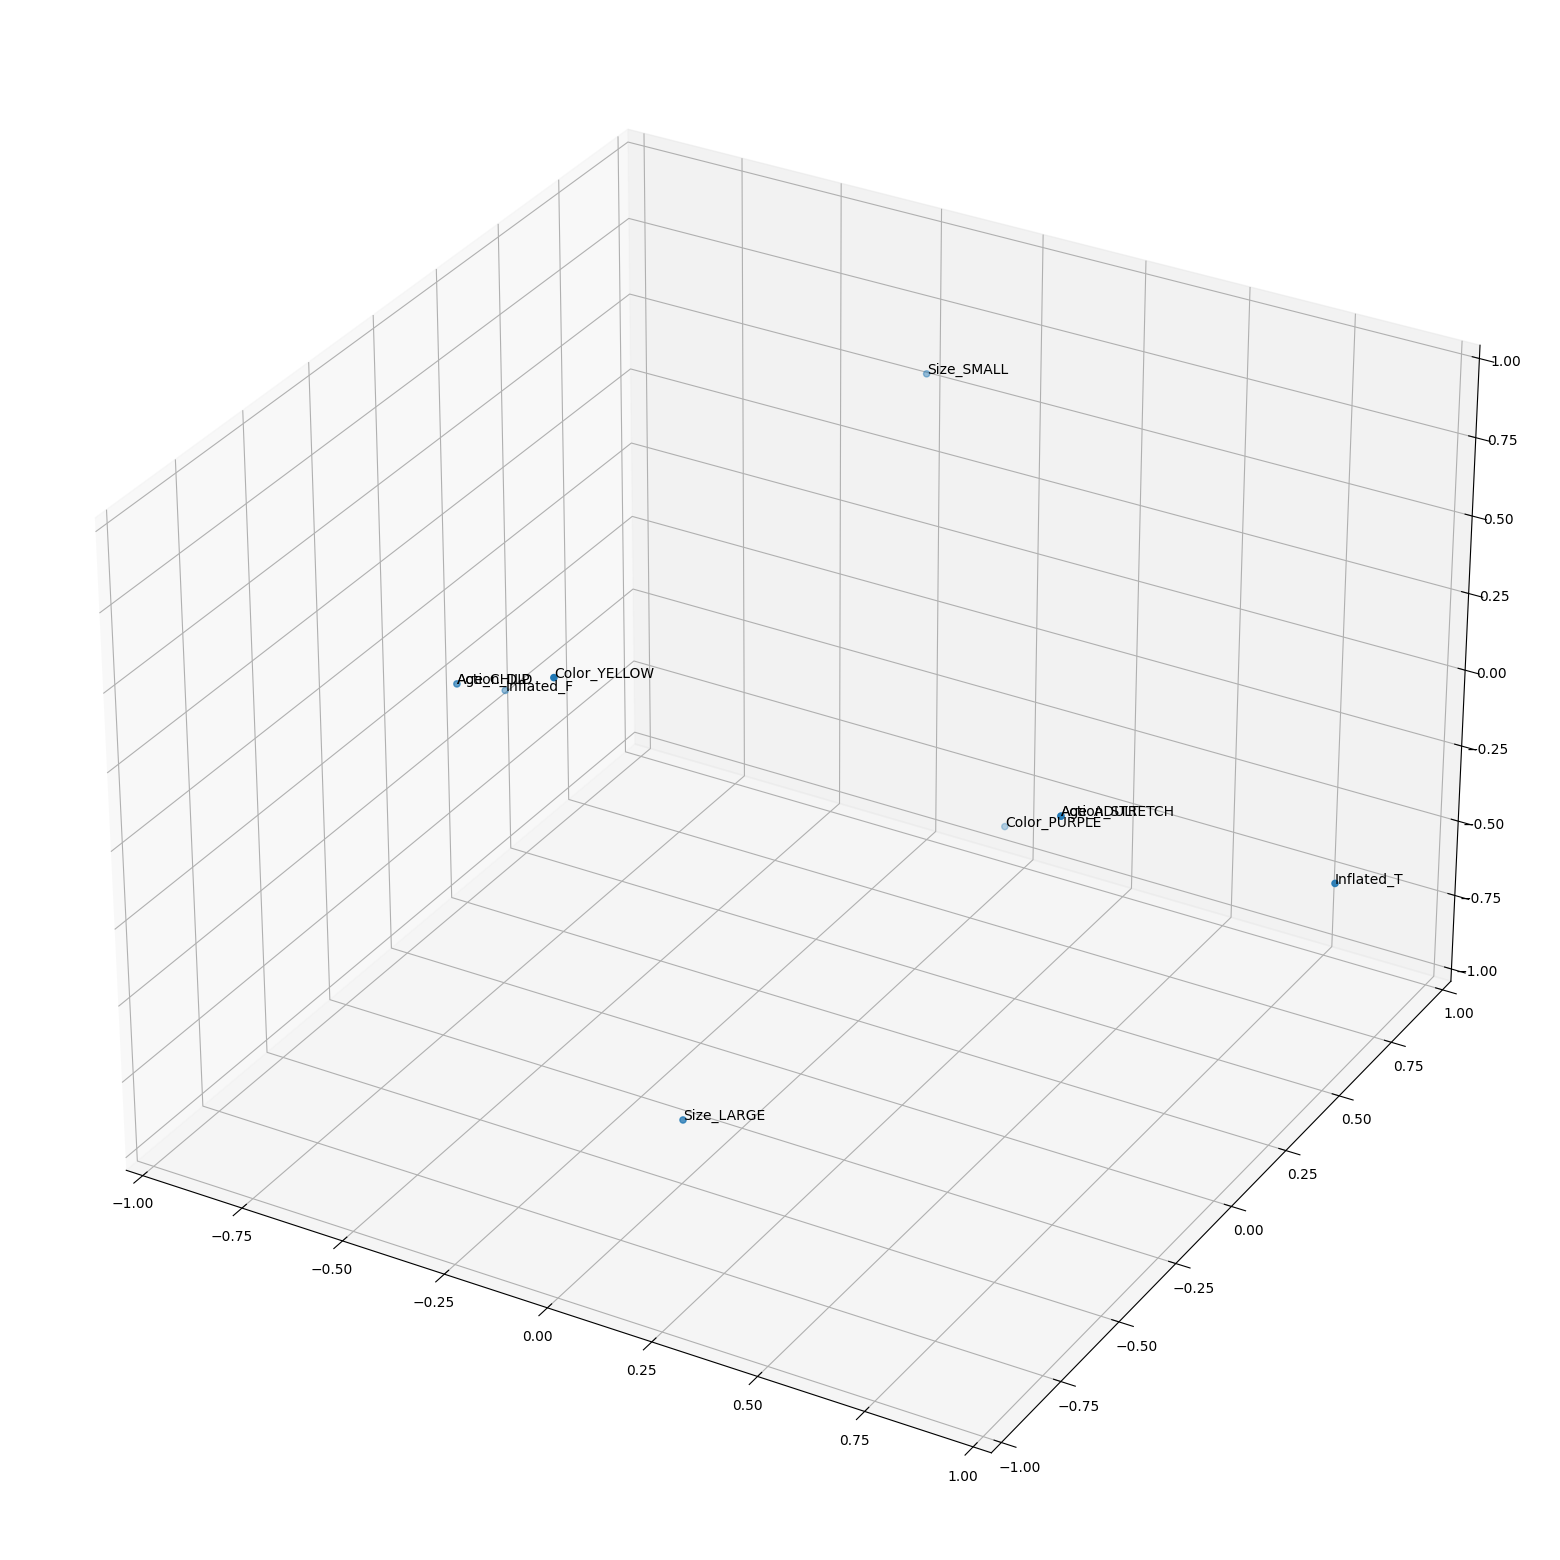

In [69]:
### Pintemos en 3d

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)


ax.scatter(DF_3d[0], DF_3d[1], DF_3d[2])

for i in range(len(DF_3d)):
    ax.text(DF_3d.iloc[i,0],DF_3d.iloc[i,1],DF_3d.iloc[i,2],DF_3d.index[i])

plt.show()

## Análisis de factores múltiple

El Análisis de Factores Múltiples (MFA, por sus siglas en inglés: Multiple Factor Analysis) es una técnica estadística utilizada para analizar conjuntos de datos que contienen variables de diferentes tipos (numéricas, categóricas, etc.) y están organizados en grupos o bloques. El MFA permite identificar patrones y relaciones entre los grupos de variables, así como explorar la estructura subyacente en los datos.

## Importancia del Análisis de Factores Múltiples

En muchos estudios y análisis, es común encontrar conjuntos de datos con múltiples grupos de variables que pueden estar correlacionados entre sí dentro de cada grupo. El MFA se utiliza para abordar este escenario, ya que permite realizar un análisis conjunto de múltiples grupos de variables, teniendo en cuenta la estructura de correlación dentro de cada grupo y las relaciones entre los grupos.

## Técnicas y pasos en el Análisis de Factores Múltiples

El MFA implica varios pasos para su implementación:

1. Preparación de los datos: Se organiza el conjunto de datos en grupos o bloques de variables. Cada grupo puede tener diferentes tipos de variables y se pueden aplicar técnicas de preprocesamiento específicas a cada tipo de variable.

2. Análisis factorial en cada grupo: Se realiza un análisis factorial en cada grupo de variables para identificar los factores subyacentes y calcular las puntuaciones de los individuos para cada factor.

3. Integración de los resultados: Se integran los resultados de los análisis factoriales de cada grupo para obtener una visión global de los datos. Esto se puede lograr mediante el análisis de las matrices de correlación entre los factores de cada grupo y la creación de una representación conjunta de los datos.

4. Interpretación de los resultados: Se interpreta la estructura de factores obtenida y se analizan las relaciones entre los grupos de variables. Esto puede involucrar la identificación de variables clave, la comparación de puntuaciones de individuos entre grupos y la exploración de asociaciones y patrones globales.

## Aplicaciones del Análisis de Factores Múltiples

El MFA tiene diversas aplicaciones en áreas como la investigación social, la psicología, el análisis de encuestas, la genética, entre otros. Se utiliza cuando hay múltiples grupos de variables y se busca comprender las relaciones entre los grupos y los patrones subyacentes en los datos.

## Evaluación de los resultados del Análisis de Factores Múltiples

La evaluación de los resultados del MFA implica examinar la estructura de factores obtenida, la varianza explicada por cada factor y las asociaciones entre los grupos de variables. Además, se pueden utilizar medidas estadísticas, como la inercia y los porcentajes de inercia explicada, para evaluar la calidad del análisis y la importancia de los grupos de variables en el espacio factorial.

## Análisis de factores múltiples en Python

El análisis de factores múltiples (MFA) está diseñado para usarse cuando tiene grupos de variables. En la práctica, construye un PCA en cada grupo, o un MCA, según los tipos de variables del grupo. Luego, construye un PCA global sobre los resultados de los llamados PCA parciales, o MCA.

El conjunto de datos utilizado en los siguientes ejemplos proviene de este [documento](https://www.utdallas.edu/%7Eherve/Abdi-MFA2007-pretty.pdf). En el conjunto de datos, tres expertos dan su opinión sobre seis vinos diferentes. Cada opinión para cada vino se registra como una variable. Por lo tanto, queremos considerar las opiniones separadas de cada experto y al mismo tiempo tener una visión global de cada vino. MFA es el método perfecto para este tipo de situación.

Primero que nada, copiemos los datos usados en el documento.

In [71]:
import prince 

dataset = prince.datasets.load_burgundy_wines()
dataset

expert Oak type Expert 1               Expert 2                         \
aspect            Fruity Woody Coffee Red fruit Roasted Vanillin Woody   
Wine 1        1        1     6      7         2       5        7     6   
Wine 2        2        5     3      2         4       4        4     2   
Wine 3        2        6     1      1         5       2        1     1   
Wine 4        2        7     1      2         7       2        1     2   
Wine 5        1        2     5      4         3       5        6     5   
Wine 6        1        3     4      4         3       5        4     5   

expert Expert 3               
aspect   Fruity Butter Woody  
Wine 1        3      6     7  
Wine 2        4      4     3  
Wine 3        7      1     1  
Wine 4        2      2     2  
Wine 5        2      6     6  
Wine 6        1      7     5

Los grupos se pasan como un diccionario a la clase MFA.

In [72]:
groups = dataset.columns.levels[0].drop("Oak type").tolist()
groups

['Expert 1', 'Expert 2', 'Expert 3']

Ajustamos un MFA

In [73]:
mfa = prince.MFA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mfa = mfa.fit(dataset, groups=groups)


El MFA hereda de la clase PCA, lo que implica que tiene acceso a todos sus métodos y propiedades. 

In [74]:
mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.835,88.82%,88.82%
1,0.357,11.18%,100.00%


In [75]:
mfa.row_coordinates(dataset)

,0,1
Wine 1,-2.172155,-0.508596
Wine 2,0.557017,-0.197408
Wine 3,2.317663,-0.830259
Wine 4,1.832557,0.905046
Wine 5,-1.403787,0.054977
Wine 6,-1.131296,0.576241


In [76]:
mfa.group_row_coordinates(dataset)

group      Expert 1            Expert 2            Expert 3          
component         0         1         0         1         0         1
Wine 1    -2.764432 -1.104812 -2.213928 -0.863519 -1.538106  0.442545
Wine 2     0.773034  0.298919  0.284247 -0.132135  0.613771 -0.759009
Wine 3     1.991398  0.805893  2.111508  0.499718  2.850084 -3.796390
Wine 4     1.981456  0.927187  2.393009  1.227146  1.123206  0.560803
Wine 5    -1.292834 -0.620661 -1.492114 -0.488088 -1.426414  1.273679
Wine 6    -0.688623 -0.306527 -1.082723 -0.243122 -1.622541  2.278372

Al igual que para el PCA, puede trazar las coordenadas de la fila con el comando plot_row_coordinates.

In [77]:
mfa.plot(
    dataset,
    x_component=0,
    y_component=1
)

alt.Chart(...)